In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
X_train=pd.read_csv("Logistic_X_Train.csv")
y_train=pd.read_csv("Logistic_Y_Train.csv")
X_test=pd.read_csv("Logistic_X_Test.csv")

In [18]:
X_train.shape

(3000, 3)

In [19]:
y_train.shape

(3000, 1)

In [20]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-1*x))

In [21]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return sigmoid( np.dot(X,theta) )

In [22]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = (y * np.log(y_hat) + ((1- y) * np.log(1-y_hat)) ).mean()
    #sum/m =mean()
    
    return -err

In [23]:
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]

In [24]:
def gradient_descent(X, y, lr =0.5, max_itr = 500):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [25]:
opt_theta, error_list = gradient_descent(X_train, y_train)

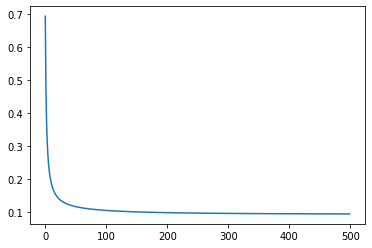

In [26]:
plt.plot(error_list)


In [30]:
y_pred = hypothesis(X_test, opt_theta)
y_pred = np.round(y_pred).astype('int')


In [31]:
df = pd.DataFrame(data=y_pred,columns=["label"])
#df = pd.DataFrame(y_pred,columns=["label"])

In [32]:
df

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [34]:
df.to_csv("Chemical_Classifier_Pred.csv",index= False)

In [60]:
# import 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
model.score(X_test,y_pred)

0.97